# Construyendo un modelo predictivo para el fraude

A través de este documento, desarrollaremos un modelo para predecir el fraude, el conjunto de datos que usaremos es un conjunto de datos de tarjetas de crédito , que incluye información de transacciones de clientes y el cual incluye la variable cualitativa fraude, la cual nos menciona si se tuvo fraude o no en la transaccion.


El fraude es uno de los problemas más importantes dentro del sector financiero, e increíblemente costoso. Según un estudio, se estima una organización típica pierde el 5% de sus ingresos anuales por fraude cada año.

es por eso la importancia de construir este modelo, si construimos un buen modelo con buena precisión, podemos ahorrar para la compañia una buena cantidad de dinero, si se quiere calcular este ahorro solo obtenga los últimos ingresos de su empresa y multiplique por 5% y este es el número que ahorraremos a la empresa si construimos un modelo robusto.








## Cargando nuestros paquetes

en esta parte cargaremos una lista de bibliotecas que usaremos para carga de datos, análisis de datos, preparación de datos, evaluación de modelos, etc.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


## Cargando conjunto de datos

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df.csv')

Nombramos el conjunto de datos como **"df"** este conjunto de datos tiene la información sobre la cual construiremos nuestro modelo

## Conociendo nuestro conjunto de datos

En este punto, realizaremos una inspección de datos para conocer mejor la información que contiene el conjunto de datos.

Es importante mencionar los nombres de las variables y una breve descripción:

A continuación se muestra el conjunto de datos del Diccionario de datos para tarjetas de crédito: -

1. **cust_id:**: Identificación del titular de la tarjeta de crédito (categórica)
2. **active_date:** fecha de activación de la tarjeta
3. **last_payment_date:** fecha del último pago
4. **balance:**: cantidad de saldo que queda en su cuenta para realizar compras 
5. **balance_frequency:**: Frecuencia con la que se actualiza el Balance, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
6. **purchases:**: Cantidad de compras realizadas desde la cuenta
7. **oneoff_purchases:**: monto máximo de compra realizado de una sola vez
8. **installments_purchases:**: Importe de la compra realizada a plazos
9. **cash_advance:**: Anticipo dado por el usuario
10. **purchases_frequency::**: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
11. **oneoff_purchases_frequency:**: Con qué frecuencia se realizan compras de una sola vez (1 = compras frecuentes, 0 = compras no frecuentes)
12. **Purchase_installments_frequency:**: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
13. **cash_advance_freecuency:**: Con qué frecuencia se paga el anticipo en efectivo
14. **cash_advance_trx:**: Número de transacciones realizadas con "Cash in Advanced"
15. **purcahases_trx:**: Número de transacciones de compra realizadas
16. **credit_limit:**: Límite de tarjeta de crédito para el usuario
17. **payments:**: Monto del pago realizado por el usuario
18. **minimum_payments**: Cantidad mínima de pagos realizados por el usuario
19. **prc_full_payments:**: Porcentaje del pago total pagado por el usuario
20. **ternure:**: Tenencia del servicio de tarjeta de crédito para el usuario
21. **fraud:** ya sea fraude o no fraude (1 = fraude, 0 = no fraude)


In [56]:
df.keys()

Index(['Unnamed: 0', 'cust_id', 'activated_date', 'last_payment_date',
       'balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'fraud'],
      dtype='object')

Ahora que conocemos el nombre de las variables de nuestro conjunto de datos, ¡veamos su forma!

In [57]:
df.shape

(8950, 22)

esta salida nos muestra que, tenemos 8950 filas y 22 columnas en nuestro conjunto de datos como vimos antes, los 21 nombres de las variables son las columnas una de estas es el índice de nuestro conjunto de datos, no te preocupes, borraremos eso después.


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   cust_id                           8950 non-null   object 
 2   activated_date                    8937 non-null   object 
 3   last_payment_date                 8941 non-null   object 
 4   balance                           8948 non-null   float64
 5   balance_frequency                 8950 non-null   float64
 6   purchases                         8950 non-null   float64
 7   oneoff_purchases                  8950 non-null   float64
 8   installments_purchases            8950 non-null   float64
 9   cash_advance                      8838 non-null   float64
 10  purchases_frequency               8950 non-null   float64
 11  oneoff_purchases_frequency        8950 non-null   float64
 12  purcha

esta salida nuevamente nos muestra el nombre de las variables del conjunto de datos y adicionalmente el tipo de datos de cada variable y cuántos valores no son nulos, por lo que, como podemos ver, tenemos menos de 8950 observaciones en algunos casos, eso significa que tenemos valores nulos y podría Será un problema construir un buen modelo.

In [59]:
'''¿ Hay datos nuelos?'''
print("¿Hay datos nulos?: ",df.isnull().values.any())

¿Hay datos nulos?:  True


con esta función, preguntamos si tenemos valores nulos y la máquina dice, sí, como sabíamos.

In [ ]:
df.isna().mean()*100

Unnamed: 0                          0.000000
cust_id                             0.000000
activated_date                      0.145251
last_payment_date                   0.100559
balance                             0.022346
balance_frequency                   0.000000
purchases                           0.000000
oneoff_purchases                    0.000000
installments_purchases              0.000000
cash_advance                        1.251397
purchases_frequency                 0.000000
oneoff_purchases_frequency          0.000000
purchases_installments_frequency    0.000000
cash_advance_frequency              0.000000
cash_advance_trx                    0.000000
purchases_trx                       0.000000
credit_limit                        0.011173
payments                            0.000000
minimum_payments                    3.586592
prc_full_payment                    0.000000
tenure                              0.000000
fraud                               0.000000
dtype: flo

con esta función podemos ver específicamente qué variables tienen valores nulos y encontramos en primer lugar, con una cantidad significativa de valores nulos, las variables **"minimum_payments"** y **"cash_advance"**, **, y en segundo lugar con ninguna cantidad significativa de valores nulos **"activated_date"** ,**"last_payment_date","balance","credit_limit"**
veremos más adelante cómo procesar estos valores.


por ahora, echemos un vistazo a nuestros primeros registros y al último en nuestro conjunto de datos, para darnos cuenta de la escala de las variables y si necesitan ser reescaladas.


In [60]:
df.head()

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [61]:
df.tail()

,Unnamed: 0,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
8945,8946,C19186,2020-07-31,2020-11-03,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,8947,C19187,2020-07-31,2020-09-06,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6,0
8947,8948,C19188,2020-07-31,2020-06-03,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,8949,C19189,2020-07-31,2020-07-19,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,8950,C19190,2020-07-31,2020-10-14,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0



Como podemos ver, nuestras variables en nuestro conjunto de datos tienen diferentes escalas y será un problema cuando intentemos construir nuestro modelo.


 # Procesamiento de datos

En este punto, como vimos en nuestro conjunto de datos, tenemos valores nulos, así que decidí borrar los valores que tienen menos del 1% de significancia en mi conjunto de datos y estas filas son:**"activated_date"** ,**"last_payment_date","balance","credit_limit"**

In [62]:
df.dropna(subset=['activated_date'], inplace=True)
df.dropna(subset=['last_payment_date'], inplace=True)
df.dropna(subset=['balance'], inplace=True)
df.dropna(subset=['credit_limit'], inplace=True)

con las variables que tengan más del 1% de significancia, llenaré estos campos con la media del resto de registros.

In [63]:
df['minimum_payments'].fillna(df['minimum_payments'].median(), inplace=True)
df['cash_advance'].fillna(df['cash_advance'].median(), inplace=True)

¡Así que ahora revisemos nuestro nuevo conjunto de datos con los cambios que hacemos!

¡Le preguntaré a Python si puede encontrar valores nulos en nuestro nuevo conjunto de datos!

In [64]:
'''¿Hay valores nulos?'''
print("¿Hay valores nulos?: ",df.isnull().values.any())

¿Hay valores nulos?:  False


finalmente, verificaré los campos en nuestro conjunto de datos,

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8925 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8925 non-null   int64  
 1   cust_id                           8925 non-null   object 
 2   activated_date                    8925 non-null   object 
 3   last_payment_date                 8925 non-null   object 
 4   balance                           8925 non-null   float64
 5   balance_frequency                 8925 non-null   float64
 6   purchases                         8925 non-null   float64
 7   oneoff_purchases                  8925 non-null   float64
 8   installments_purchases            8925 non-null   float64
 9   cash_advance                      8925 non-null   float64
 10  purchases_frequency               8925 non-null   float64
 11  oneoff_purchases_frequency        8925 non-null   float64
 12  purcha

como ya sabíamos, no hay más valores nulos en nuestro conjunto de datos.

Resumen:

Tenemos un conjunto de datos con valores no nulos, con 21 columnas y 8925 filas, ya conocemos los nombres de las columnas y sabemos un poquito de cada una.

Como última idea, echaré un vistazo breve a la variable "Fraude", ya que recordamos que es una variable binaria con los valores 0 si no hay fraude y 1 si es fraude.


In [ ]:
class_names = {0:'Nor fraud',1:'Fraud'}
print(df.fraud.value_counts().rename(index=class_names))

Nor fraud    8855
Fraud          70
Name: fraud, dtype: int64


sobre esta variable, observe que solo tenemos 70 casos de fraude, lo que significa que tenemos un gran desequilibrio de esta variable. la mayoría de los raws no son fraudulentos, puede ser un problema en este momento intentar realizar nuestro modelo.

# Estadística descriptiva


In [66]:
df.describe()

,Unnamed: 0,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,4474.898599,1565.896545,0.877233,1002.770199,592.080286,410.990937,967.731594,0.490239,0.202306,0.364391,0.135105,3.250756,14.709804,4493.280463,1732.711902,844.816246,0.153655,11.517871,0.007843
std,2584.560123,2082.968200,0.236894,2134.639756,1658.772383,904.605899,2091.317385,0.401398,0.298320,0.397444,0.200027,6.829360,24.879509,3637.558244,2895.014304,2335.229084,0.292406,1.336586,0.088218
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2236.000000,128.375213,0.888889,39.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.150843,170.895638,0.000000,12.000000,0.000000
50%,4474.000000,873.680279,1.000000,360.950000,37.500000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,311.963409,0.000000,12.000000,0.000000
75%,6713.000000,2059.035678,1.000000,1111.120000,577.830000,468.650000,1097.698179,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1900.699307,786.588160,0.142857,12.000000,0.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


en la última tabla podemos ver las estadísticas univariadas para todas nuestras variables, en esta podemos ver estimaciones de ubicación como media, mínima, máxima, distribución acumulada de nuestros datos (25%, 50%, 75).

y también podemos ver estimaciones de variabilidad como std o desviación estándar, nos muestra qué tan lejos están los valores de la media, lo que significa la distribución de nuestros valores.

por ejemplo para un saldo variable:

tiene 8925 valores es significa clientes, el valor máximo es 19,043 de saldo es significa que el cliente más rico de mi muestra tiene este saldo en su cuenta, el valor mínimo 0.00 es significa que el cliente más pobre no tiene dinero en su saldo ,, en promedio cada cliente tiene un saldo de 1,565.00, es decir si sumamos todo el dinero y luego se lo damos a nuestros clientes por la misma cantidad cada uno recibirá esta cantidad.

en los valores 25%, 50% y 70% es una distribución de nuestros valores, lo que significa que si ordenamos los saldos de menor a mayor al 25% de nuestra distribución ordenada podemos encontrar un saldo alrededor de 128,37 de saldo, en El 50% de nuestra distribución ordenada podemos encontrar un saldo de alrededor de 4474,00 de saldo, y al 75% de nuestra distribución ordenada podemos encontrar un saldo de alrededor de 6713,00 de saldo.

¿qué pasa con la desviación estándar? en std tenemos el valor 2584.56 de balance es qué tan lejos están los datos de la media, por ejemplo, la media en este caso es 4474.Los valores se distribuyen alrededor de este número, lo que significa que algunos de ellos son más bajos que la media y algunos de ellos son mayores que la media, por lo que si restamos el valor de std y también agregamos el valor de std a la media alrededor de estos límites, tendremos aproximadamente el 60% de nuestros valores y si restamos y sumamos dos std de la media tendremos cerca del 95% de nuestros valores en estos límites, lo que significa qué tan lejos están los valores de la media.

podemos hacer la misma descripción para todas las variables, pero por ahora, les dejo este breve ejemplo.

Finalmente, observe que el std en la mayoría de las variables es mayor que la media, esto significa que encontraremos mucha dispersión de los valores bastante lejos de la media y podemos encontrar distribuciones con una cola larga.


# Estandarización de datos

Como vimos antes, las variables tienen diferentes escalas, así que estandarizaré las variables para hacerlas comparables.

In [67]:
dfnum = df[df.columns[4:21]] 
dfnum.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,311.963409,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [68]:
scaler = StandardScaler()
caracteristicas_escaladas = scaler.fit_transform(dfnum.values)
dfstd = pd.DataFrame(caracteristicas_escaladas,
                                       index = dfnum.index,
                                       columns=dfnum.columns)
dfstd

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.732167,-0.249284,-0.425093,-0.356959,-0.348891,-0.462764,-0.806158,-0.678188,-0.707203,-0.675473,-0.476024,-0.510883,-0.960390,-0.528839,-0.302046,-0.525517,0.360737
1,0.785736,0.134492,-0.469787,-0.356959,-0.454357,2.618216,-1.221397,-0.678188,-0.916887,0.574428,0.109715,-0.591275,0.689160,0.818805,0.097437,0.234504,0.360737
2,0.446144,0.518267,-0.107565,0.109177,-0.454357,-0.462764,1.270033,2.674101,-0.916887,-0.675473,-0.476024,-0.108923,0.826623,-0.383662,-0.093157,-0.525517,0.360737
3,0.048383,-1.016835,0.232478,0.546772,-0.454357,-0.364357,-1.013779,-0.398831,-0.916887,-0.258841,-0.329589,-0.551079,0.826623,-0.598549,-0.228193,-0.525517,0.360737
4,-0.359211,0.518267,-0.462291,-0.347313,-0.454357,-0.462764,-1.013779,-0.398831,-0.916887,-0.675473,-0.476024,-0.551079,-0.905405,-0.364225,-0.256959,-0.525517,0.360737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.738124,0.518267,-0.333401,-0.356959,-0.132519,-0.462764,1.270033,-0.678188,1.179960,-0.675473,-0.476024,-0.350099,-0.960390,-0.486076,-0.340855,1.184532,-4.128562
8946,-0.742594,0.518267,-0.329240,-0.356959,-0.122702,-0.462764,1.270033,-0.678188,1.179960,-0.675473,-0.476024,-0.350099,-0.960390,-0.503256,-0.228193,-0.525517,-4.128562
8947,-0.740570,-0.185323,-0.402137,-0.356959,-0.294720,-0.462764,0.854793,-0.678188,0.760592,-0.675473,-0.476024,-0.390295,-0.960390,-0.570475,-0.326495,0.329508,-4.128562
8948,-0.745343,-0.185323,-0.469787,-0.356959,-0.454357,-0.445282,-1.221397,-0.678188,-0.916887,0.157796,-0.183154,-0.591275,-1.097853,-0.580396,-0.337913,0.329508,-4.128562


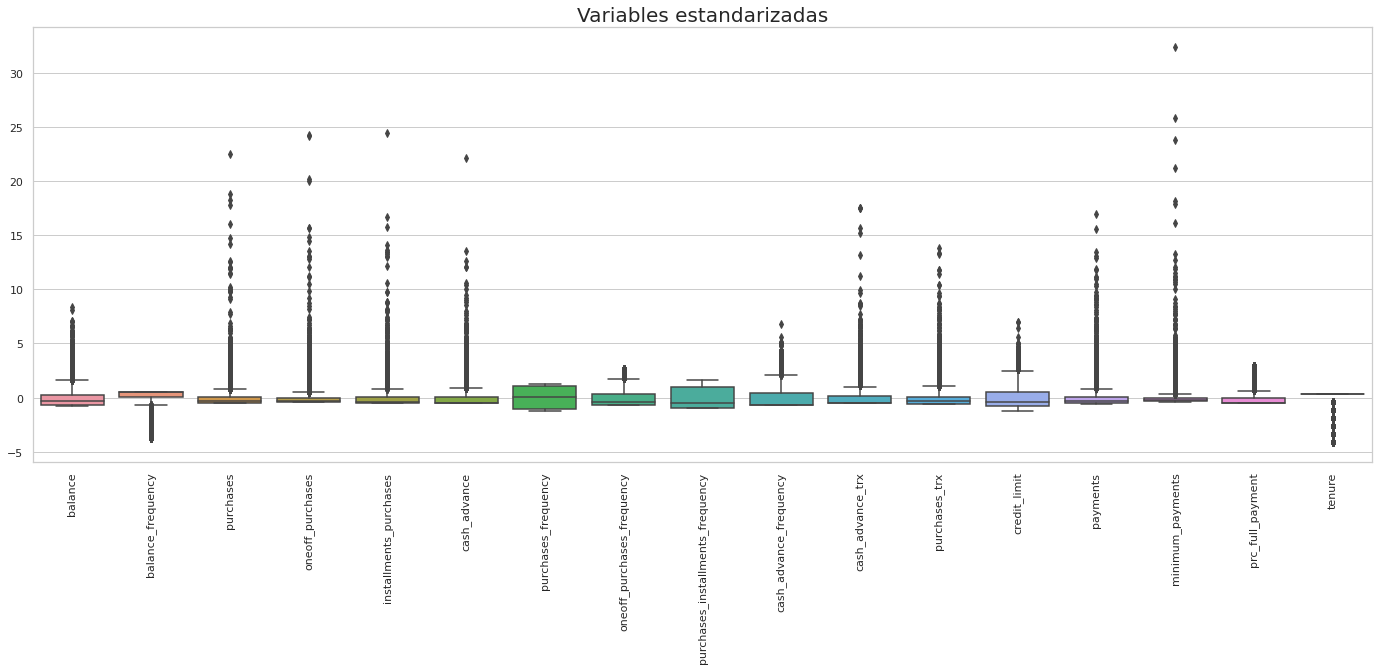

In [69]:
plt.figure(figsize=(24,8))
sns.boxplot(data = dfstd)
plt.title("Variables estandarizadas",fontsize = 20)
plt.xticks(rotation=90) 
plt.show()

En este gráfico de diagrama de caja, podemos ver las distribuciones que ya vimos en las estadísticas descriptivas, ya que sospechamos que podemos ver distribuciones con una cola larga, las observaciones podrían ser valores atípicos y, en este caso, conservaremos estos datos para construir nuestra modelo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43d1b25210>,
      dtype=object)

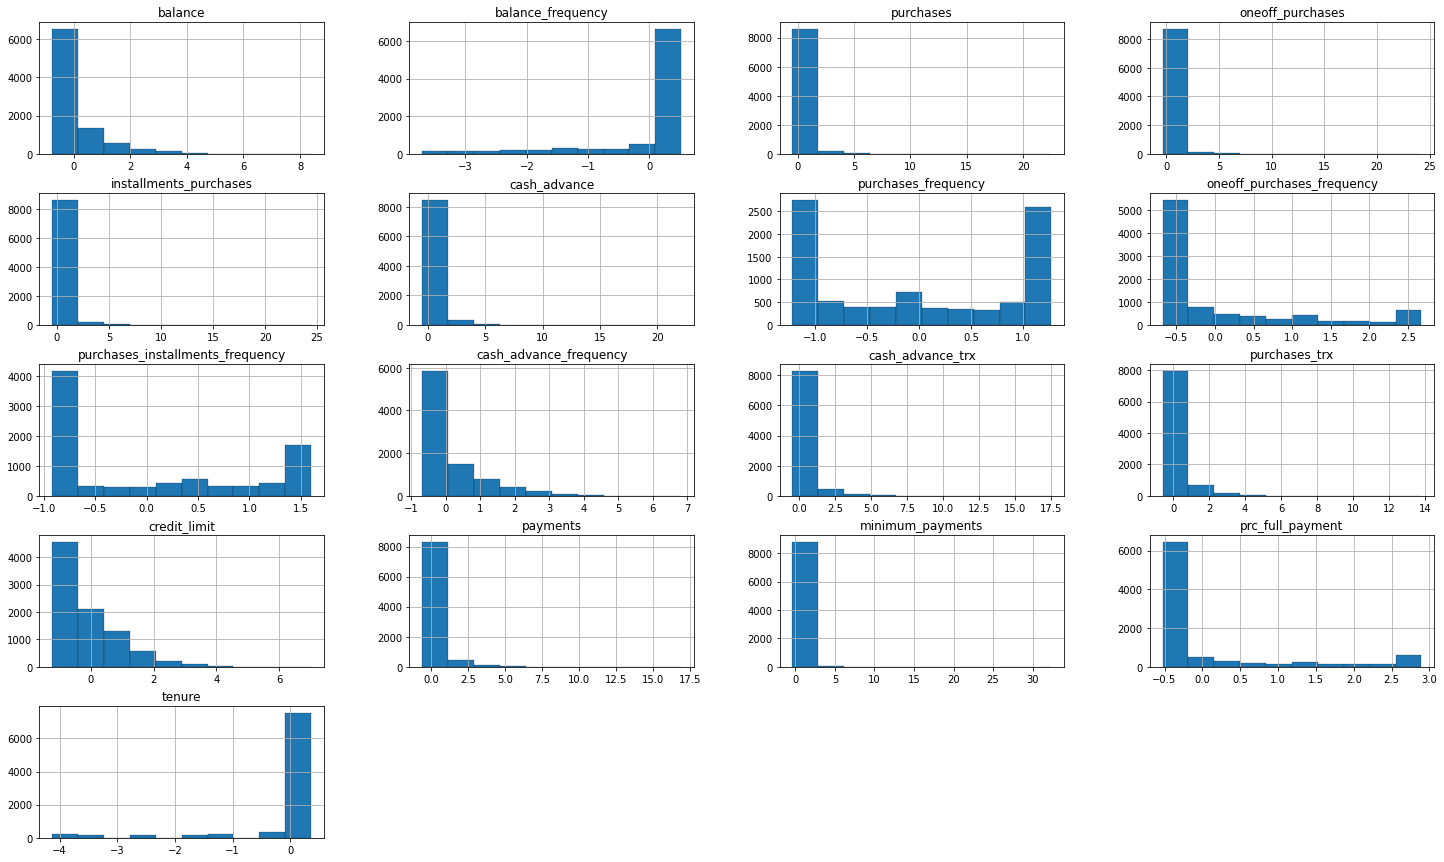

In [ ]:
'''HISTOGRAMAS'''
dfstd.hist(edgecolor="black",linewidth=0.2,grid=True,figsize=(25,15))

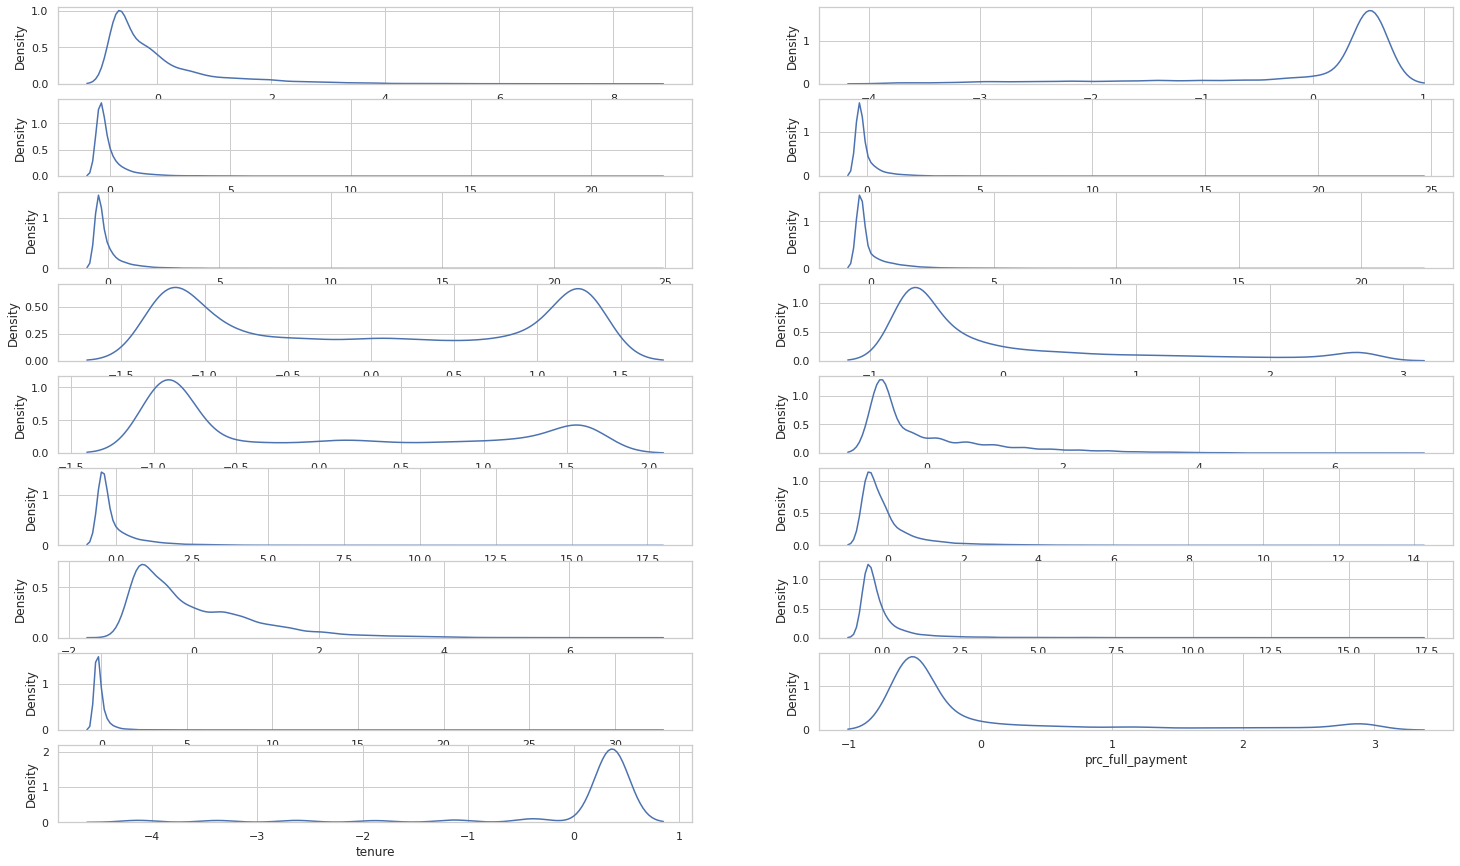

In [70]:
plt.figure(figsize=(25,15))
for i, col in enumerate(dfstd.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(dfstd[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Los histogramas y diagramas de densidad nos muestran la distribución de nuestros datos de forma discreta y continua.

como se puede ver en todas las variables la mayoría de los datos están cerca de 0 esto sucedió porque estandarizamos las variables con una media de 0 a una desviación estándar de 1 para comparar las variables.

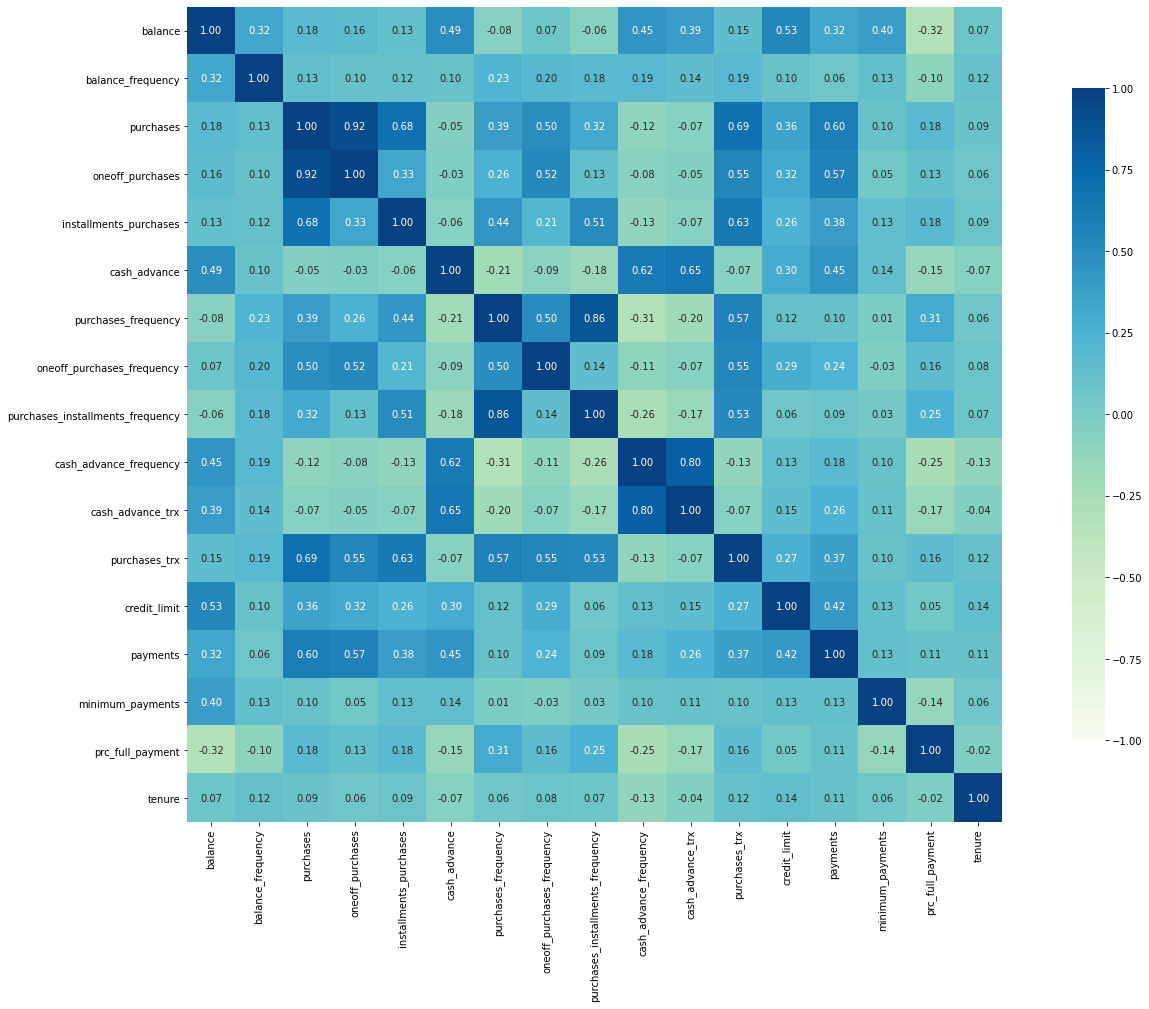

In [ ]:

corr_matrix = dfstd.corr()
plt.figure(figsize=(25,15))
ax = sns.heatmap(corr_matrix,
                 vmax=1,
                 vmin=-1,
                 cbar_kws={"shrink":.8},
                 square=True,
                 annot=True,
                 fmt=".2f",
                 cmap="GnBu",
                 center=0)
plt.show()

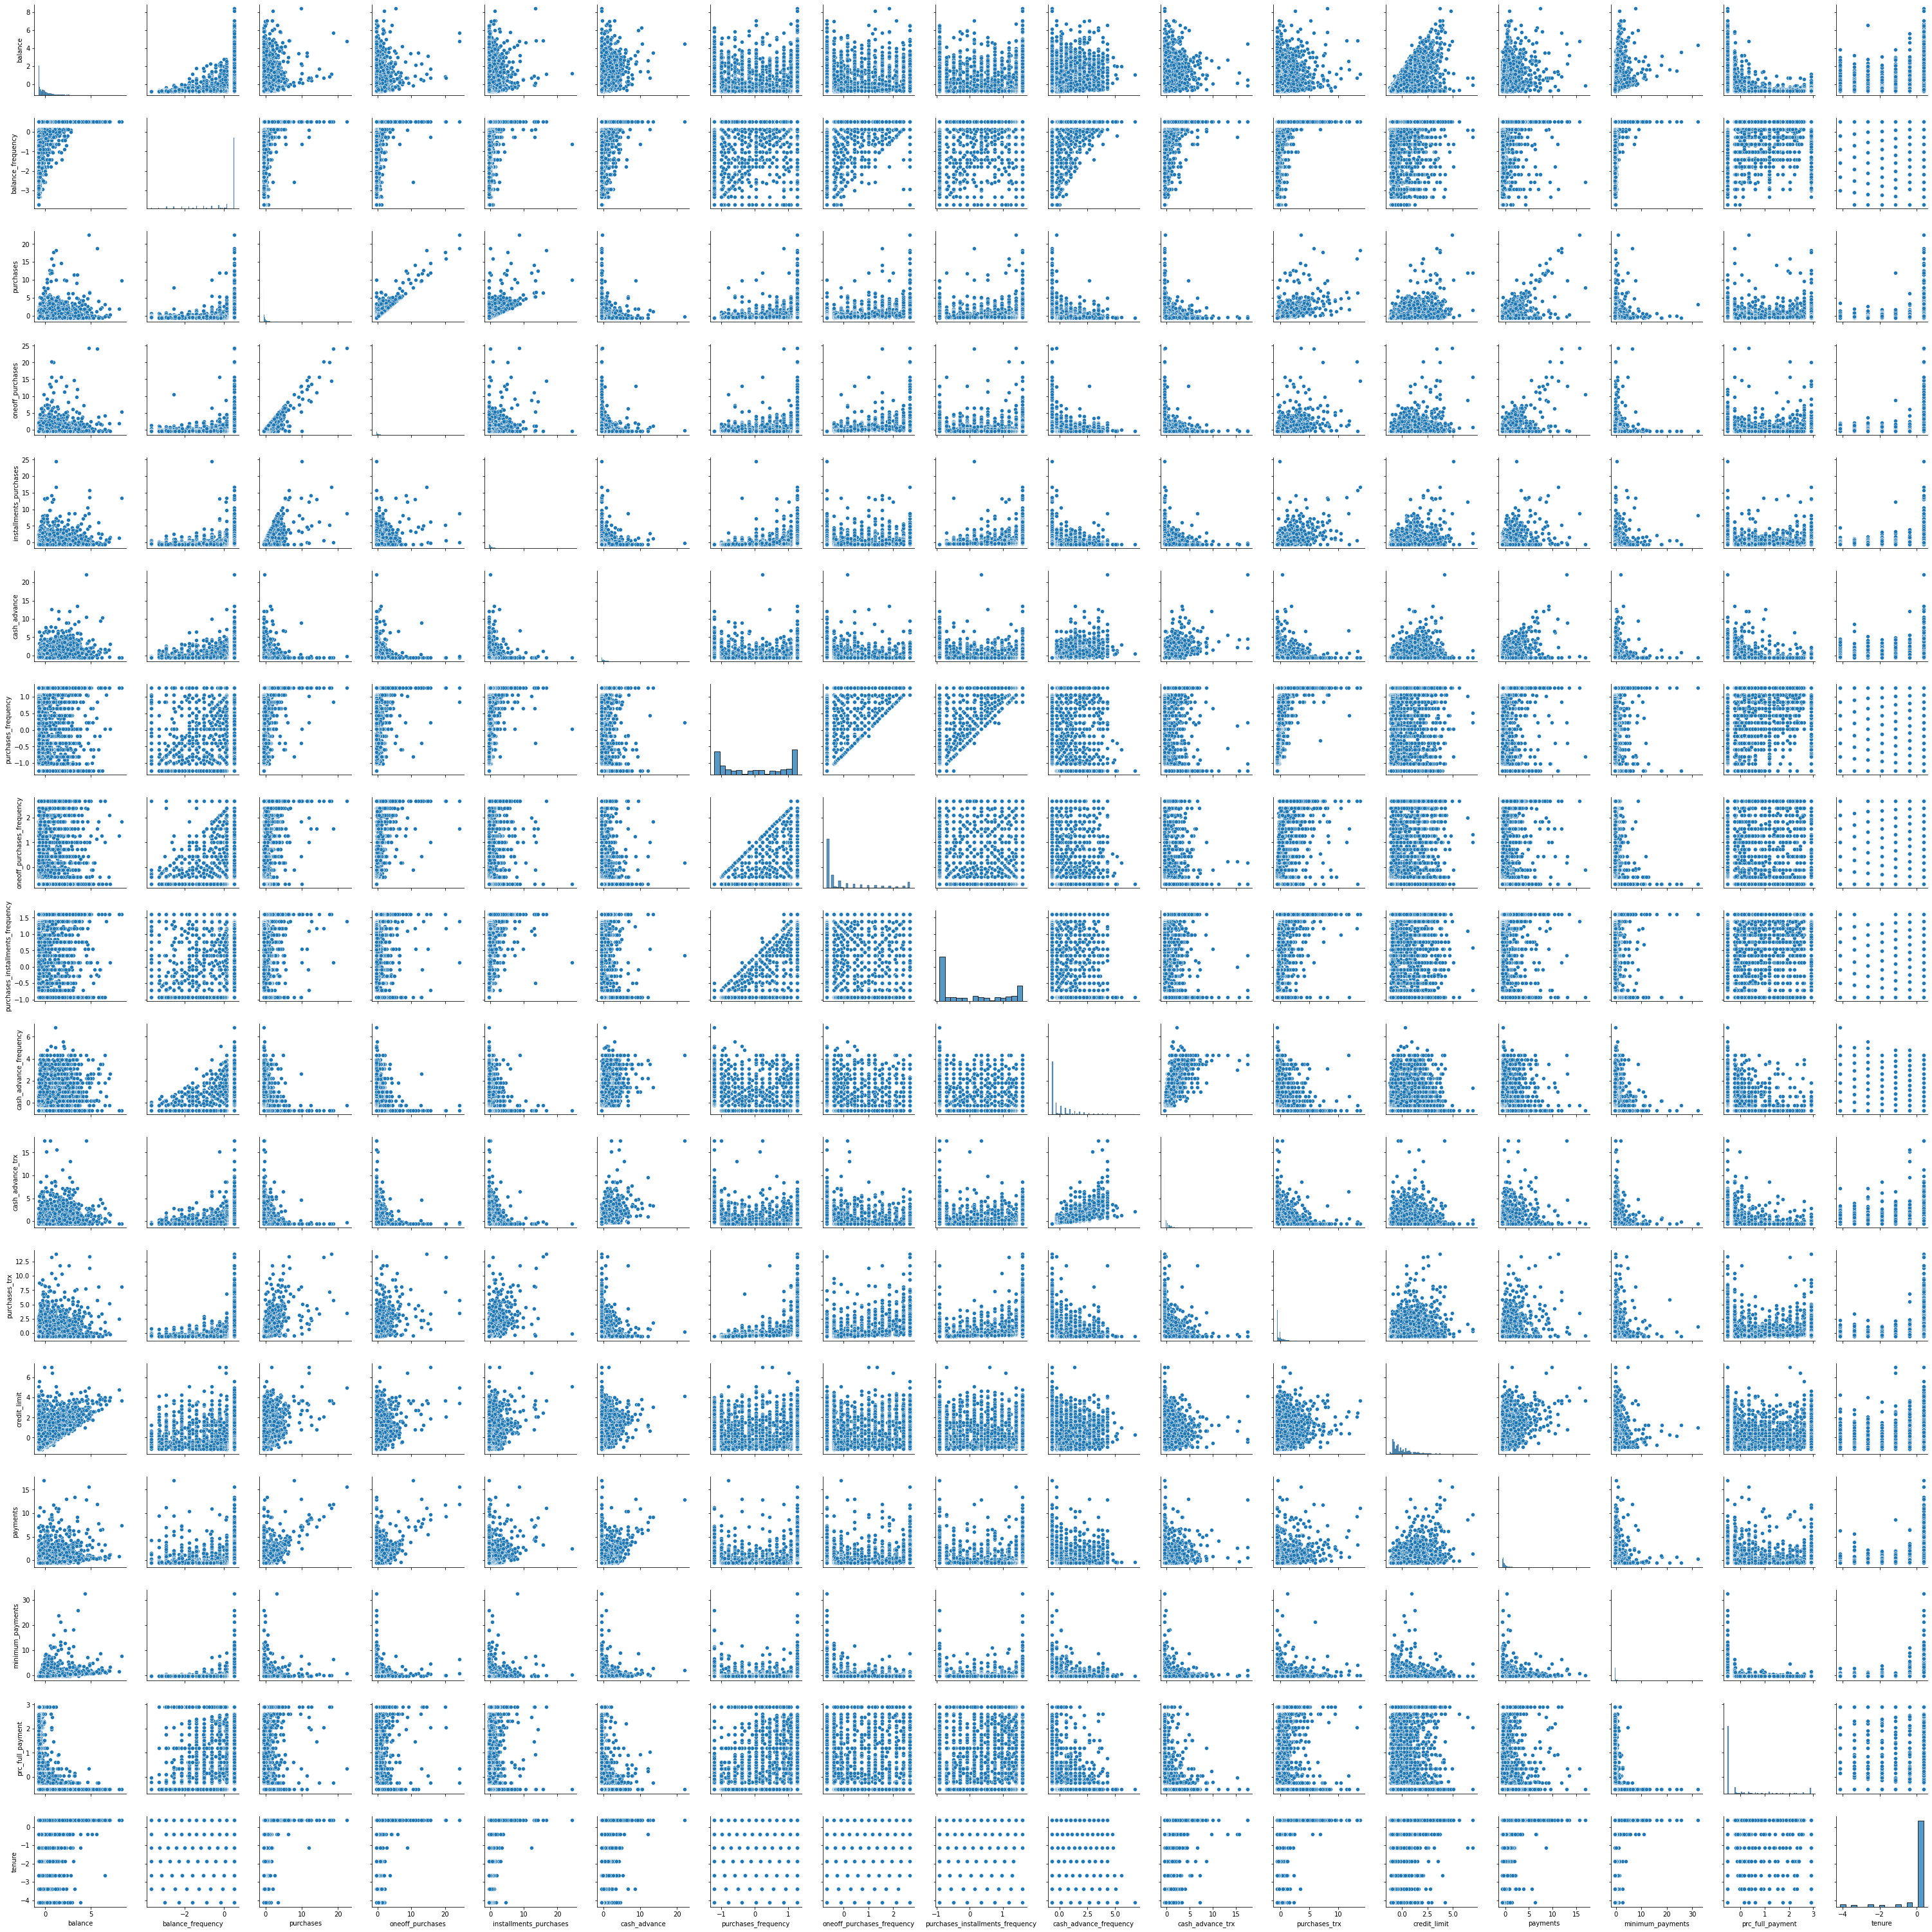

In [ ]:
sns.pairplot(dfstd)

en la última visualización, encontramos una correlación entre dos variables, en el primer gráfico, podemos encontrar valores de correlaciones que están entre -1 a 1, si encontramos valores -1 a 0 significa que las variables tienen una correlación negativa si vimos valores de 0 a 1 significa que la variable tiene una correlación positiva si el valor de la correlación es 0 significa que no hay una correlación entre las variables.

En el segundo gráfico podemos ver la dispersión de los datos que podría ayudar a ver más claramente las correlaciones entre valores si es positivo, negativo o no hay correlación.

Analizamos la variable de saldo dentro de nuestro conjunto de datos.



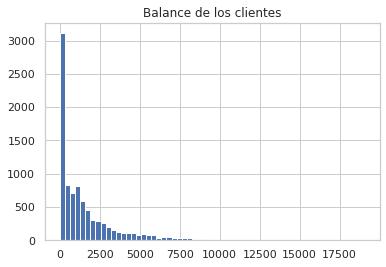

<Figure size 432x288 with 0 Axes>

In [71]:
plt.title('Balance de los clientes')
plt.hist(df['balance'], bins = 60)
plt.grid(True)
plt.show()
plt.clf()

In [ ]:
df['balance'].describe()

count     8925.000000
mean      1565.896545
std       2082.968200
min          0.000000
25%        128.375213
50%        873.680279
75%       2059.035678
max      19043.138560
Name: balance, dtype: float64

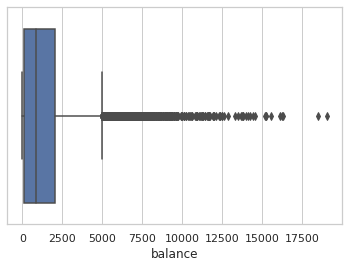

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['balance'])

Como vimos antes, el valor mínimo del saldo es 0, lo que significa que hay clientes con 0 en su saldo y el valor máximo es 19043, que es el cliente más rico de mi muestra y también podemos ver que casi todos los clientes tienen 5000 en su saldo. en una distribución normal, más de 5000 son valores atípicos considerados que significan un balance inusual de los clientes.

# CONSTRUIMOS EL MODELO

en este caso para el fraude predictivo desarrollaremos un modelo de regresión logística.

¿Por qué este modelo?

Las técnicas de clasificación son una parte esencial del aprendizaje automático, ya que aproximadamente el 70% de los problemas son de clasificación. Hay muchos algoritmos de clasificación, pero la regresión logística es común y un método de regresión útil para resolver problemas de clasificación binaria.

La regresión logística es una clasificación, estima valores discretos (valores binarios como 0/1, sí / no, verdadero / falso) basados en un conjunto dado de variables independientes. Básicamente, predice la probabilidad de ocurrencia de un evento por ajustando datos a una función logit. también se conoce como regresión logit. Los valores obtenidos estarían siempre entre 0 y 1 ya que predice la probabilidad.

En nuestro caso, tenemos que predecir si existe fraude o no tenemos una variable binaria independiente.


definimos nuestra variable independiente y nuestra variable dependiente

x (independiente): nuestras variables independientes son todas las características numéricas de nuestro conjunto de datos

y (dependiente): nuestra variable dependiente es la variable fraude que nos dice si existe fraude o no

In [72]:
x=dfstd
y=df['fraud']

en este punto, divida el conjunto de datos en prueba y entrene datos de prueba, divídalo en el 30% de nuestros datos para la prueba y el 70% para construir o modelar.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Defino la función LogisticRegresion() para construir la regresión logística

In [74]:
algoritmo = LogisticRegression()

Nosotras entrenamos el modelo usando la instrucción de ajuste

In [75]:
algoritmo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

hacemos una predicción, utilizando la instrucción de predicción y los datos de prueba.

In [76]:
y_pred = algoritmo.predict(X_test)

Revisamos nuestro parametros

In [77]:
print("Intercept:", algoritmo.intercept_)
print("Coeficiente:", list(zip(x.columns, algoritmo.coef_.flatten(), )))

Intercept: [-7.19184921]
Coeficiente: [('balance', 0.5917706773395175), ('balance_frequency', -0.09922681398539128), ('purchases', 0.43054081255622706), ('oneoff_purchases', 0.4303301259155858), ('installments_purchases', 0.22262792699944894), ('cash_advance', 0.3698896938286307), ('purchases_frequency', -0.11796641636218544), ('oneoff_purchases_frequency', -0.24384114652468222), ('purchases_installments_frequency', 0.045765988797441017), ('cash_advance_frequency', 0.24467297333680152), ('cash_advance_trx', 0.10196605896511826), ('purchases_trx', 0.28343765304038954), ('credit_limit', -0.33447505540888556), ('payments', 0.16429559068833885), ('minimum_payments', -0.013348847977887063), ('prc_full_payment', -0.19173370299140224), ('tenure', 0.02225375696527447)]


como podemos ver, la variable con mayor beta es el balance, es decir, tiene el predictor de fraude más poderoso.

# Revisemos algunas métricas para darle veracidad a nuestro modelo.

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:\n',matriz)

Matriz de Confusión:
 [[2659    1]
 [   4   14]]


La matriz nos dice que tiene 2659 datos positivos verdaderos, es decir, datos que en los datos reales fueron 1 y el modelo los predijo correctamente, también que 12 datos negativos verdaderos, esto significa datos reales que fueron 0 y el modelo los predijo como semejante.

Veamos ahora la cantidad de datos que el modelo no predijo correctamente. Comencemos con los datos falsos negativos, en total fue 1, esto significa datos reales que fueron 1 pero el modelo los predijo como 0. En cuanto a los datos falsos positivos, fueron solo 6, que en realidad fueron 0 y el modelo lo predijo como 1.

In [ ]:
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
scoref1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print ('Model precision:', precision)
print ('Model accuracy:', accuracy)
print ('Model sensitivity:', sensitivity)
print ('F1 score of model:', scoref1)
print ('ROC curve - AUC of the model:', roc_auc)

Model precision: 0.9333333333333333
Model accuracy: 0.9981329350261389
Model sensitivity: 0.7777777777777778
F1 score of model: 0.8484848484848485
ROC curve - AUC of the model: 0.8887009189640768


Como vemos las pruebas de bondad de ajuste del modelo de precisión y exactitud tal vez nos muestren un sobreajuste de los datos, esto se debe a que tenemos datos desbalanceados, por lo que estas métricas pueden ser engañosas, por lo que optamos por utilizar otras métricas de bondad de ajuste. que son más robustos a la hora de medir la calidad del modelo o que provienen de datos desbalanceados, que son sensibilidad, puntaje f1 y roc_uac, que nos muestran ajustes más reales, por lo que la medida de sensibilidad muestra un ajuste del 61% de nuestro modelo .

## Conclusiones.

Para construir el modelo utilicé un modelo simple como es la regresión logística para clasificar la variable de fraude, existen más modelos de clasificación que se podrían implementar para comparar sus métricas entre sí, con estos resultados podríamos elegir uno de todos los que tienen el mejores pruebas de bondad de ajuste.

Con base en los datos tenemos un conjunto de datos desbalanceado porque en el modelo de fraude hay eventos que no son muy comunes, es decir, en la vida real tenemos una pequeña cantidad de fraude en el año, sin embargo, algo interesante sería hacer un modelo que prediga el impacto de esta transacción, una forma de solucionar el problema del desbalance de datos podría ser técnicas de remuestreo de datos que se puedan aplicar, sin embargo, para hacerlo necesitamos tener un mayor conocimiento del negocio para no remover información que puede ser de gran importancia para el análisis, en este caso tomé la decisión de no volver a muestrear, por lo que elegí buscar métricas que midan el ajuste de mi modelo con mayor precisión.

